In [15]:
import networkx as nx
from sklearn.linear_model import LogisticRegression
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [17]:
class World:
    def __init__(self,  agents, init_edge_proba=0, edge_creat_proba=1, max_edges = np.inf):
        self.G=nx.Graph()
        
        for agent in agents:
            self.G.add_node(agent)
            
        for target in self.G.nodes:
            for other in self.G.nodes:
                if target != other and random.random() < init_edge_proba:
                    self.G.add_edge(target, other)
                    
        self.centrality_dict = nx.degree_centrality(self.G)
        self.max_edges = max_edges
        self.edge_creat_proba = edge_creat_proba
        self.history = pd.DataFrame()
        
    def draw(self):
        fig = plt.figure(figsize = (10,10))
        nx.draw(self.G, with_labels=False)
        plt.plot()
        
    def edge_evaluation(self, pred_a, pred_b):
        return (pred_a+pred_b)/2*self.edge_creat_proba > 0.5
        
        
    def utility_function(self, agent, other):
        is_connected = [agent, other] in self.G.edges
        
        if is_connected:
            return other.calculate_embeddedness()
        else:
            return 0
    
    def update_history(self, **kwargs):
        pass
        
    def iterate(self, steps, verbose=0, draw=False):
        for step in range(steps):
            for agent in self.G.nodes:
                agent.learn(self)
                agent.edge_remaining = self.max_edges
            for agent in self.G.nodes:
                agent.prediction_dict[step] = {}
                for other in self.G.nodes:
                    if other != agent:
                        prediction = agent.predict(other, self)
                        
                        self.update_history(agent=agent, other=other, prediction=prediction)
                        
                        agent.prediction_dict[step][other] = prediction
                        
            for pair in itertools.combinations(self.G.nodes, 2):
                if self.edge_evaluation(pair[0].prediction_dict[step][pair[1]],
                                        pair[1].prediction_dict[step][pair[0]]):
                    
                    if pair not in self.G.nodes:
                        self.G.add_edge(*pair)
                        
                elif pair in self.G.nodes:
                    self.G.remove_edge(*pair)
                
            if draw:
                self.draw()
                
            self.centrality_dict = nx.degree_centrality(self.G)

In [18]:
class AgentSkeleton:
    def __init__(self):
        self.prediction_dict = {}
    
    def learn(self, world):
        pass
    
    def predict(self, other, world):
        return random.random()
    
    def calculate_embeddedness(self, world):
        return world.connectivity_dict[self]
        
    

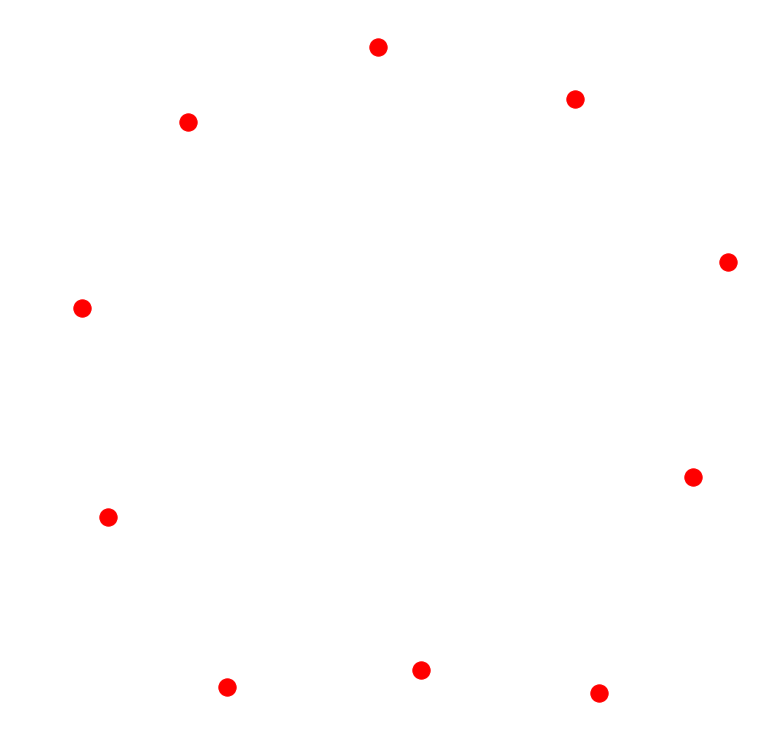

In [19]:
agents = [AgentSkeleton() for i in range(10)]
test_world = World(agents)
test_world.draw()

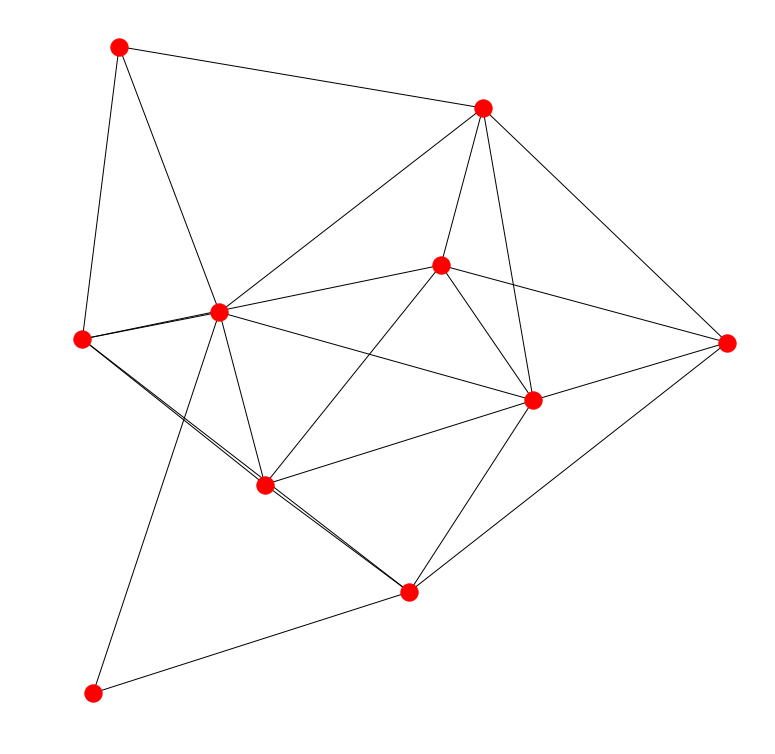

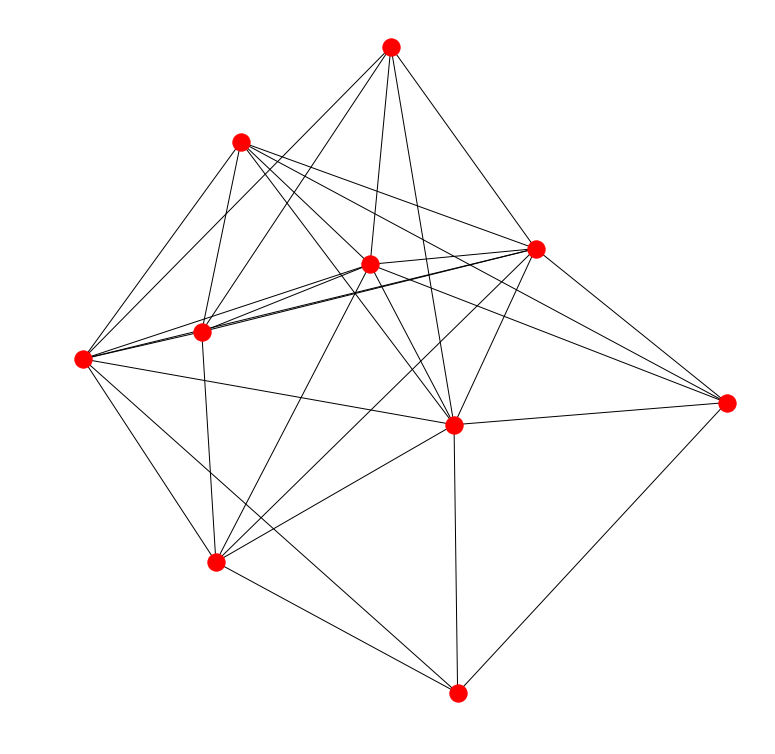

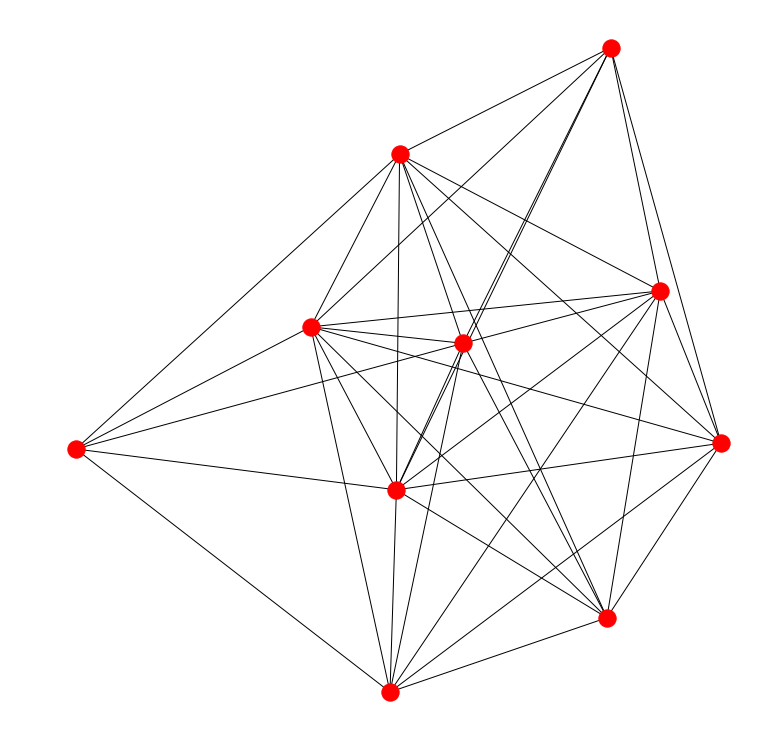

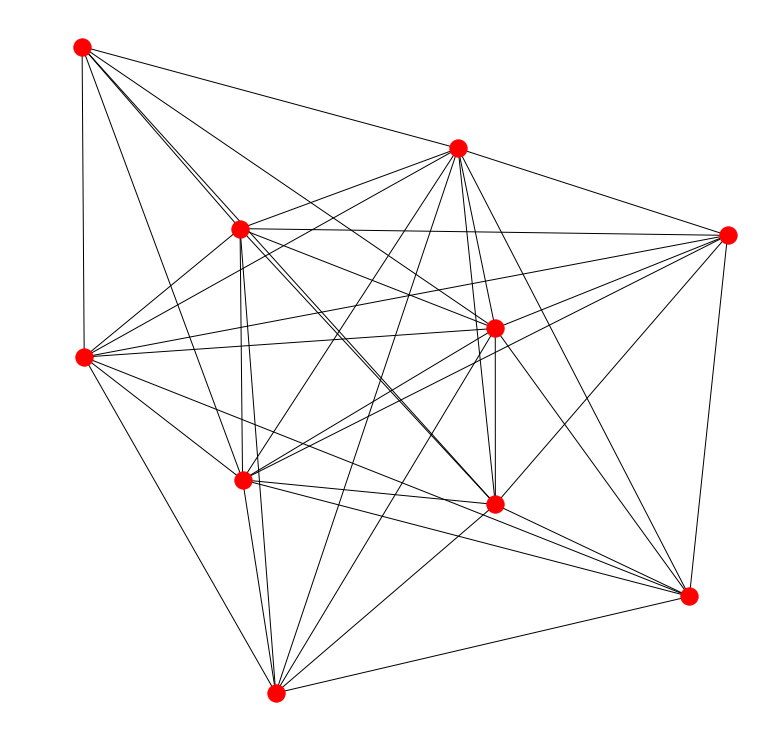

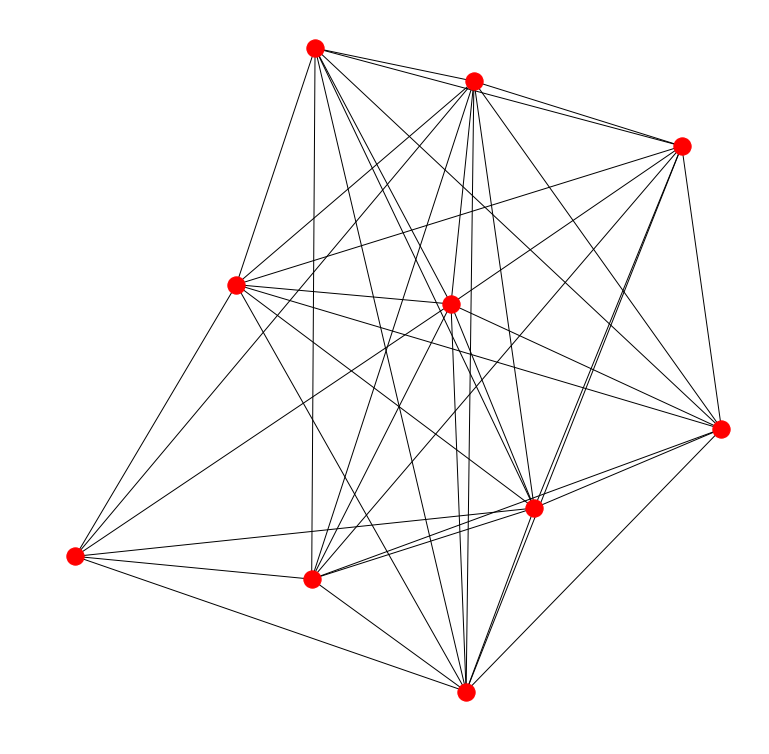

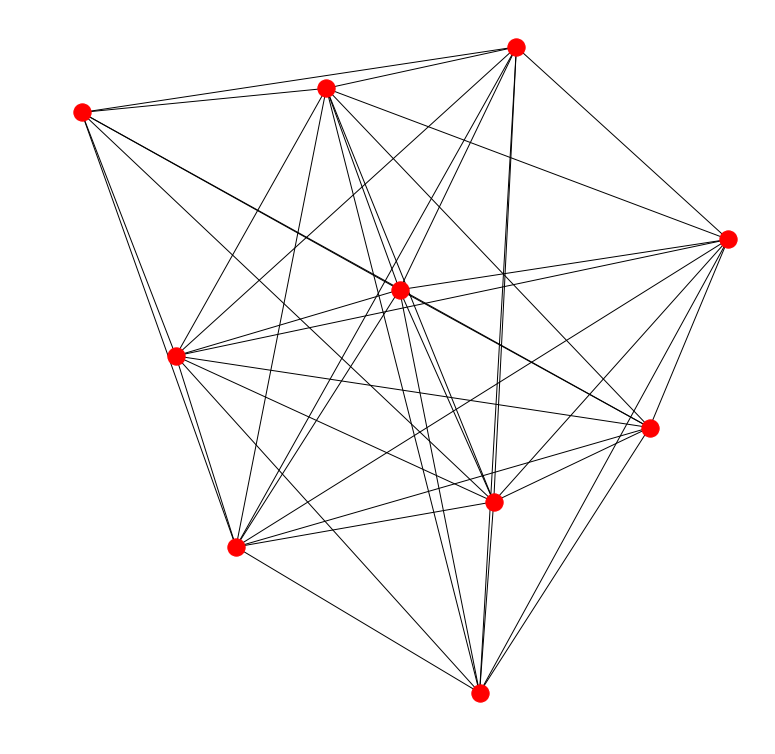

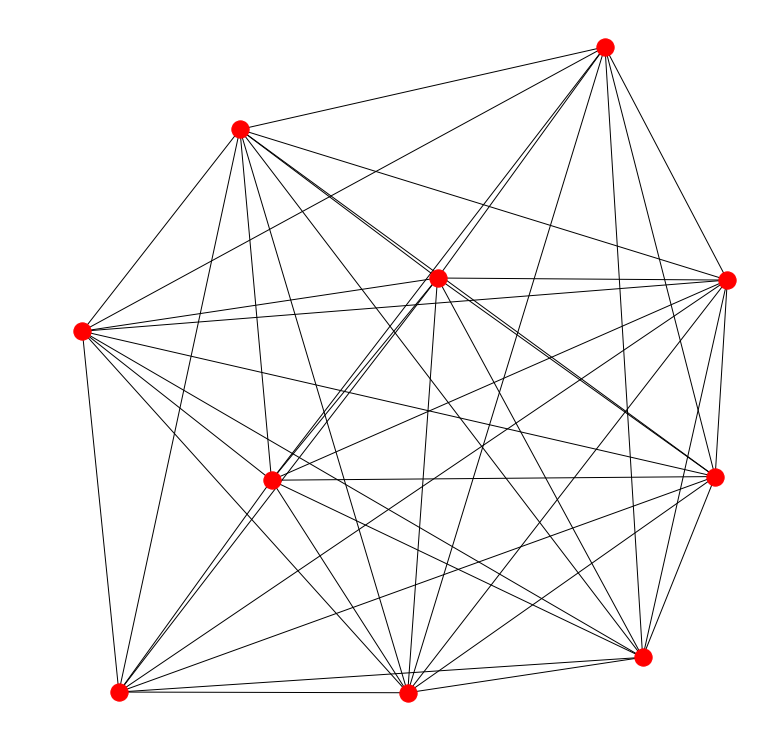

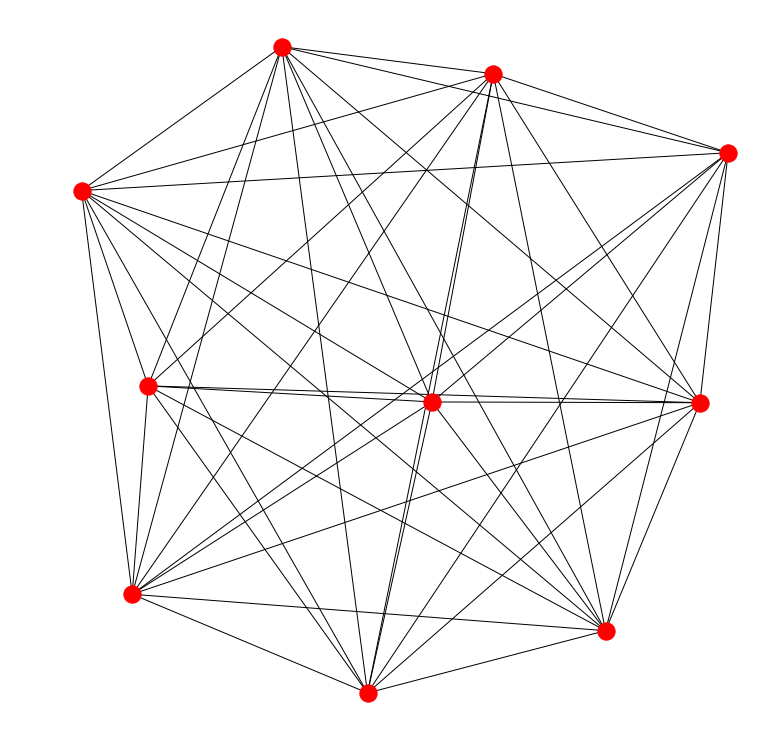

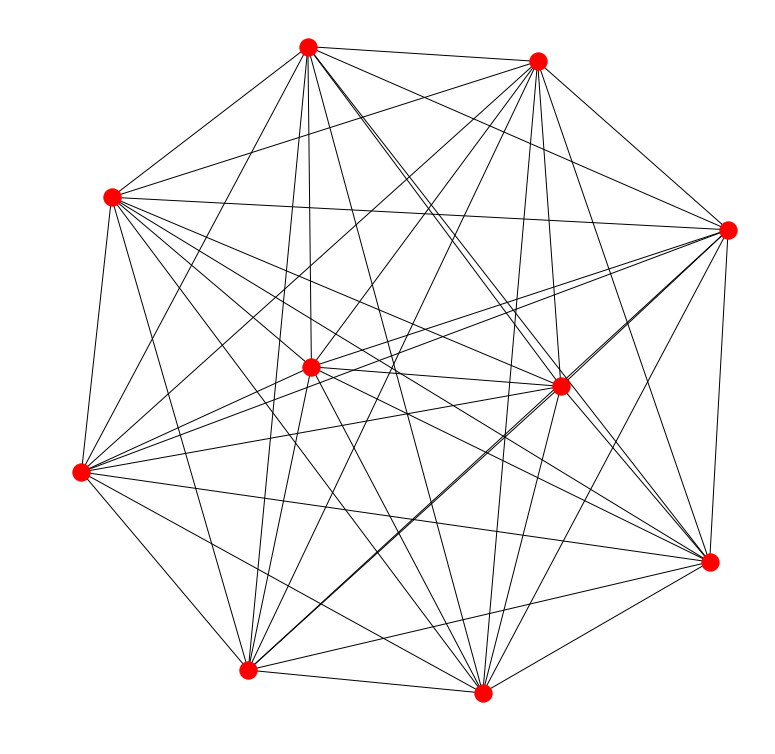

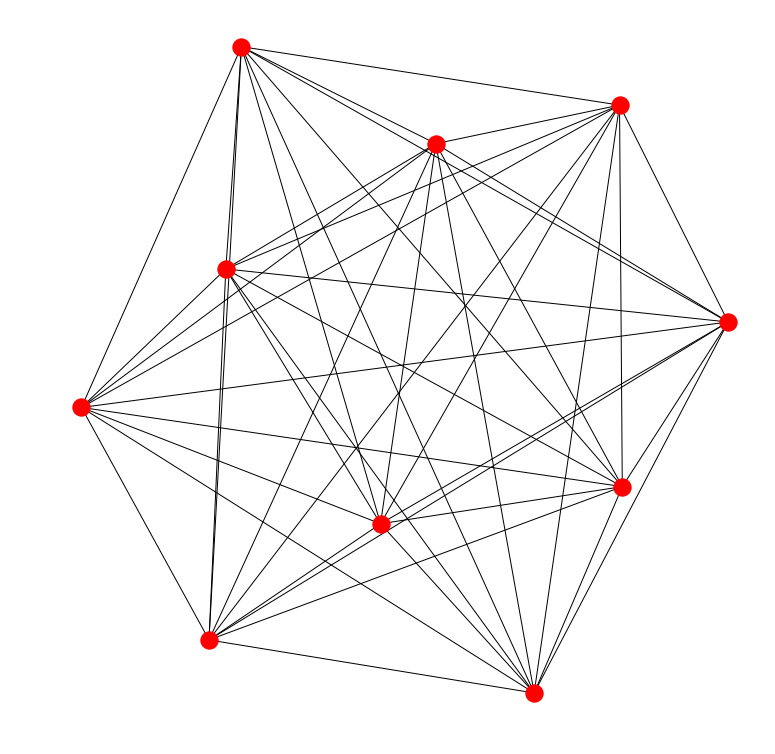

In [20]:
test_world.iterate(10, draw = True)

In [ ]:
test_world.update_history(almafa = 0 )